# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 2: *SeparableFourierTransform*
Compute the Fourier transform of an image using the separable formulation <br> Display the magnitude and phase and reconstruct image
***  

### Setup modules

In [6]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF
from ImageOperatorsUtilities import imageLogF
from PrintUtilities import printProgress

# Iteration and Math functions
from math import sin, cos, pi, sqrt, atan2, log
from timeit import itertools

### Read and show input image

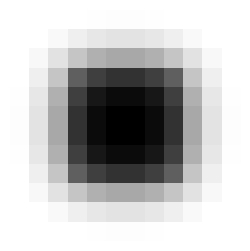

In [7]:
imageName = "Square.png"
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter2/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 3)

### Create an image to store ferquency coefficients <br> Two floats to represent a complex number

In [8]:
maxFreqW = int(width /2)
maxFreqH = int(height/2)
numCoeffW = 1 + 2 * maxFreqW
numCoeffH = 1 + 2 * maxFreqH
coeff = createImageF(numCoeffW ,numCoeffH , 2)

### Compute Fourier coefficients

In [16]:
# Adjust the size of the data to be even
m = float(width)
n = float(height)
if width % 2 == 0:
    m = width + 1.0
if height % 2 == 0:
    n = height + 1.0  
    
# Fundamental frequency
ww = (2.0 * pi) / m
wh = (2.0 * pi) / n

# Fourier Transform
for u in range(-maxFreqW, maxFreqW + 1):
    printProgress(u + maxFreqW, numCoeffW)
    entryW = u + maxFreqW 
    
    for v in range(-maxFreqH, maxFreqH + 1):
        entryH = v + maxFreqH
        coeff[entryH, entryW] = [0, 0]
        
        for x in range(0, width):
            sumY = [0, 0] 
            
            for y in range(0, height):
                sumY[0] += inputImage[y,x] * cos(y * wh * v)
                sumY[1] += inputImage[y,x] * sin(y * wh * v)
            coeff[entryH, entryW][0] += sumY[0] * cos(x * ww * u) - sumY[1] * sin(x * ww * u)
            coeff[entryH, entryW][1] -= cos(x * ww * u) * sumY[1] + sin(x * ww * u) * sumY[0]

        coeff[entryH, entryW][0] /= m*n 
        coeff[entryH, entryW][1] /= m*n

0 / 13  .. 1 / 13  .. 2 / 13  .. 3 / 13  .. 4 / 13  .. 5 / 13  .. 6 / 13  .. 7 / 13  .. 8 / 13  .. 9 / 13  .. 10 / 13  .. 11 / 13  .. 12 / 13  .. 

### Compute power

In [17]:
power = createImageF( 1 + 2 * maxFreqW, 1 + 2 * maxFreqH)
for kw,kh in itertools.product(range(-maxFreqW, maxFreqW + 1), range(-maxFreqH, maxFreqH + 1)):                  
    entryW = kw + maxFreqW 
    entryH = kh + maxFreqH 
    power[entryH, entryW] = sqrt(coeff[entryH, entryW][0] * coeff[entryH, entryW][0] +              \
                                 coeff[entryH, entryW][1] * coeff[entryH, entryW][1])
                 
    power[entryH, entryW] = log(1.0 + power[entryH, entryW])

### Copute phase

In [18]:
phase = createImageF( 1 + 2 * maxFreqW, 1 + 2 * maxFreqH)
for kw,kh in itertools.product(range(-maxFreqW, maxFreqW + 1), range(-maxFreqH, maxFreqH + 1)):
    indexInArrayW = kw + maxFreqW 
    indexInArrayH = kh + maxFreqH 
    phase[indexInArrayH, indexInArrayW] = atan2(coeff[indexInArrayH, indexInArrayW][1],             \
                                                coeff[indexInArrayH, indexInArrayW][0])


### Show the log of the power and phase

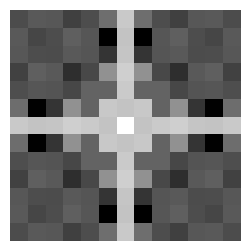

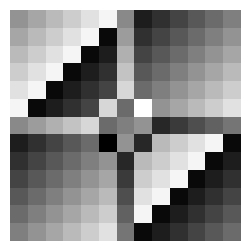

In [19]:
powerLog = imageLogF(power)
plotImageF(powerLog, figureSize = 3)
plotImageF(phase, figureSize = 3)

### Reconstruct image from Fourier coefficients

In [20]:
reconstruction = createImageF(width, height)
for u in range(-maxFreqW, maxFreqW + 1):
    printProgress(u + maxFreqW, numCoeffW)
    entryW = u + maxFreqW 
    for v in range(-maxFreqH, maxFreqH + 1):
        entryH = v + maxFreqH 
        for x in range(0, width):
            for y in range(0, height):
                 
                reconstruction[y,x] += (coeff[entryH, entryW][0] / (m*n)) * (cos(x * ww * u) * cos(y * wh * v) - sin(x * ww * u) * sin(y * wh * v)) - \
                                       (coeff[entryH, entryW][1] / (m*n)) * (cos(x * ww * u) * sin(y * wh * v) + sin(x * ww * u) * cos(y * wh * v))   



0 / 13  .. 1 / 13  .. 2 / 13  .. 3 / 13  .. 4 / 13  .. 5 / 13  .. 6 / 13  .. 7 / 13  .. 8 / 13  .. 9 / 13  .. 10 / 13  .. 11 / 13  .. 12 / 13  .. 

### Show recustructed image

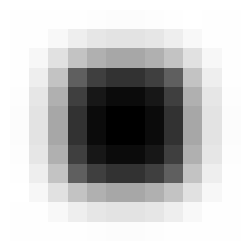

In [21]:
plotImageF(reconstruction, figureSize = 3)